In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

#import cosima_cookbook as cc

In [2]:
# Output data path
outputpath='/g/data1/v45/pm2987/Spunup/output037/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'ocpo.nc')
p=ncfile.variables['p'][0:200,0,:,:]
pmean=np.nanmean(p,axis=0)
# Import geographic coordinates (Lon,Lat)
x=ncfile.variables['xp'][:]
y=ncfile.variables['yp'][:]
p=ncfile.variables['p'][0:2,0,:,:]

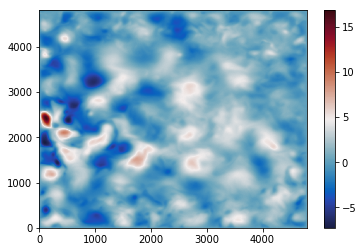

In [3]:
pcolormesh(x,y,p[0,:,:]-pmean,cmap=cm.cm.balance)
colorbar()

In [4]:
eddytd=analyseddyzt(p,x,y,0,1,1,15,0.1,0.1,data_meant=pmean,areamap='',mask=''\
                     ,destdir='',physics='',checkarea=False,diagnostics=False,pprint=False)
eddytdn=analyseddyzt(p,x,y,0,1,1,-15,-0.1,-0.1,data_meant=pmean,areamap='',mask=''\
                     ,destdir='',physics='',checkarea=False,diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 93 s  Number of contours analysed: 4 
 0% [>]100% Time Elapsed: 86 s  Number of contours analysed: 47 


In [5]:
#for key,items in eddytdn.items():
    #print(items['2dgaussianfit'][0],items['level'][0])

#twoD_Gaussian(eddytdn['eddyn_15']['position_maxvalue'][0:2], *eddytdn['eddyn_15']['2dgaussianfit'])
#


In [6]:
eddytdn['eddyn_0']

{'2dgaussianfit': array([[ 6.28993514e+01,  1.29614719e+02, -9.50019136e-02,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 'angle': array([-0.22153929]),
 'area': array([7.89944917e+13]),
 'contour': [[array([105.        , 110.        , 115.        , 120.        ,
          125.        , 130.        , 135.        , 140.        ,
          142.31969781, 145.        , 150.        , 155.        ,
          160.        , 165.        , 170.        , 175.        ,
          175.04720019, 180.        , 185.        , 190.        ,
          195.        , 200.        , 205.        , 210.        ,
          215.        , 220.        , 225.        , 230.        ,
          235.        , 235.32566546, 240.        , 243.30372128,
          245.        , 246.83229279, 248.71633402, 249.71308876,
          250.        , 250.14117293, 250.18234414, 250.        ,
          249.93815111, 249.50853716, 248.93708896, 248.25602506,
          247.48094757, 246.61859735, 245.67218149, 245. 

In [7]:
sfield=reconstruct_syntetic(shape(p),x,y,eddytd,diagnostics=False)+reconstruct_syntetic(shape(p),x,y,eddytdn,diagnostics=False)

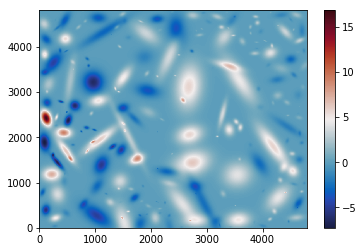

In [8]:
pcolormesh(x,y,sfield[0,:,:],cmap=cm.cm.balance)
colorbar()

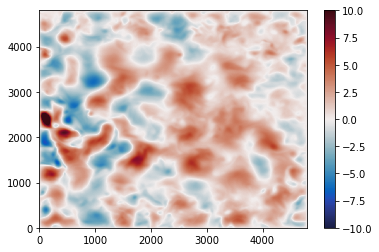

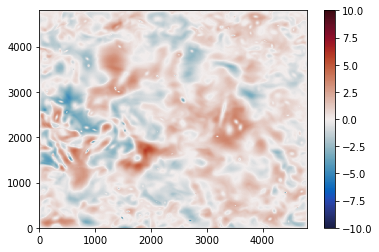

In [9]:
pcolormesh(x,y,p[0,:,:]-pmean,vmin=-10,vmax=10,cmap=cm.cm.balance)
colorbar()
show()
pcolormesh(x,y,p[0,:,:]-pmean-sfield[0,:,:],vmin=-10,vmax=10,cmap=cm.cm.balance)
colorbar()
show()